## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv("QueryResults.csv", header=0, names=["DATE", "TAG", "POSTS"])
df.columns

Index(['DATE', 'TAG', 'POSTS'], dtype='object')

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
print(df.head())
print(df.tail())


                  DATE       TAG  POSTS
0  2008-07-01 00:00:00        c#      3
1  2008-08-01 00:00:00  assembly      8
2  2008-08-01 00:00:00         c     83
3  2008-08-01 00:00:00        c#    505
4  2008-08-01 00:00:00       c++    164
                     DATE     TAG  POSTS
2477  2023-06-01 00:00:00     php   2020
2478  2023-06-01 00:00:00  python  11725
2479  2023-06-01 00:00:00       r   2710
2480  2023-06-01 00:00:00    ruby    229
2481  2023-06-01 00:00:00   swift   1163


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [4]:
df.shape

(2482, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
df.count()

DATE     2482
TAG      2482
POSTS    2482
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [7]:
df.groupby("TAG").sum(numeric_only=True) # only look at columns with numeric values (otherwise makes no sense)

,POSTS
TAG,
assembly,42910
c,397157
c#,1594301
c++,795196
delphi,51012
go,69602
java,1898827
javascript,2498146
perl,67688


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [8]:
# count gives number of rows with relevant tag 
# each row = 1 month for a particular language
df.groupby("TAG").count() 

,DATE,POSTS
TAG,,
assembly,179,179
c,179,179
c#,180,180
c++,179,179
delphi,179,179
go,164,164
java,179,179
javascript,179,179
perl,179,179


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [9]:
# Both syntaxes do same thing
df["DATE"][1]
df.DATE[1]


'2008-08-01 00:00:00'

In [10]:
type(df["DATE"][1])

str

In [11]:
df["DATE"] = pd.to_datetime(df["DATE"])
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [12]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df
pivoted_df = test_df.pivot(index="Age", columns="Actor", values="Power")
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [13]:
pivoted_compute_df = df.pivot(index="DATE", columns="TAG", values="POSTS")
pivoted_compute_df.fillna(0, inplace=True) # must use inplace else would need to use pivoted_compute_df = pivoted_compute_df.fillna(0)
pivoted_compute_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1641.0,754.0,104.0,0.0,1129.0,634.0,130.0,475.0,537.0,6.0,287.0,0.0
2008-10-01,16.0,302.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1731.0,734.0,141.0,0.0,956.0,580.0,97.0,499.0,449.0,1.0,157.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,188.0,1309.0,4763.0,2222.0,133.0,660.0,5190.0,10453.0,79.0,2428.0,15720.0,3803.0,340.0,1296.0
2023-03-01,180.0,1266.0,4912.0,2572.0,143.0,639.0,5541.0,10545.0,95.0,2283.0,15569.0,3832.0,301.0,1368.0
2023-04-01,197.0,1190.0,3853.0,1968.0,121.0,516.0,4503.0,8320.0,56.0,1944.0,12444.0,3108.0,220.0,1098.0


In [14]:
print(pivoted_compute_df.shape)
display(pivoted_compute_df.head())

(180, 14)


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1641.0,754.0,104.0,0.0,1129.0,634.0,130.0,475.0,537.0,6.0,287.0,0.0
2008-10-01,16.0,302.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1731.0,734.0,141.0,0.0,956.0,580.0,97.0,499.0,449.0,1.0,157.0,0.0


In [15]:
display(pivoted_compute_df.tail())
print(pivoted_compute_df.columns)

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2023-02-01,188.0,1309.0,4763.0,2222.0,133.0,660.0,5190.0,10453.0,79.0,2428.0,15720.0,3803.0,340.0,1296.0
2023-03-01,180.0,1266.0,4912.0,2572.0,143.0,639.0,5541.0,10545.0,95.0,2283.0,15569.0,3832.0,301.0,1368.0
2023-04-01,197.0,1190.0,3853.0,1968.0,121.0,516.0,4503.0,8320.0,56.0,1944.0,12444.0,3108.0,220.0,1098.0
2023-05-01,176.0,1052.0,3849.0,1785.0,115.0,428.0,4205.0,7814.0,54.0,1979.0,11840.0,2868.0,256.0,1003.0
2023-06-01,160.0,924.0,3943.0,1919.0,120.0,544.0,4512.0,7807.0,55.0,2020.0,11725.0,2710.0,229.0,1163.0


Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [16]:
pivoted_compute_df.sum(axis=0)

TAG
assembly        42910.0
c              397157.0
c#            1594301.0
c++            795196.0
delphi          51012.0
go              69602.0
java          1898827.0
javascript    2498146.0
perl            67688.0
php           1458594.0
python        2141741.0
r              492163.0
ruby           228028.0
swift          327910.0
dtype: float64

In [17]:
pivoted_compute_df.count()

TAG
assembly      180
c             180
c#            180
c++           180
delphi        180
go            180
java          180
javascript    180
perl          180
php           180
python        180
r             180
ruby          180
swift         180
dtype: int64

In [18]:
pivoted_compute_df.isna().values.any() # check if any nans still in df

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

           DATE   TAG  POSTS
6    2008-08-01  java    222
17   2008-09-01  java   1129
29   2008-10-01  java   1149
40   2008-11-01  java    956
52   2008-12-01  java    826
...         ...   ...    ...
2418 2023-02-01  java   5190
2432 2023-03-01  java   5541
2446 2023-04-01  java   4503
2460 2023-05-01  java   4205
2474 2023-06-01  java   4512

[179 rows x 3 columns]


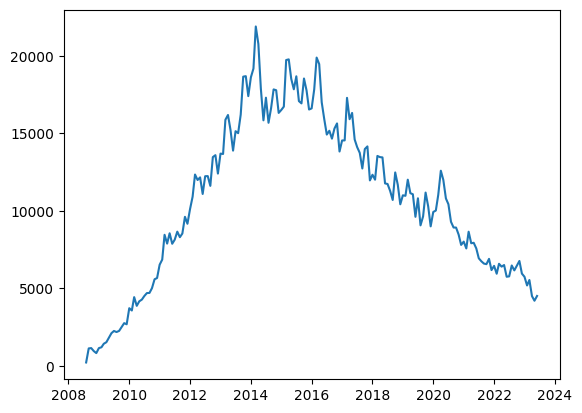

In [19]:
java = df.loc[df["TAG"]=="java"]
print(java)
# Two methods
# Method 1:
plt.plot(java["DATE"], java["POSTS"])
plt.show()



**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

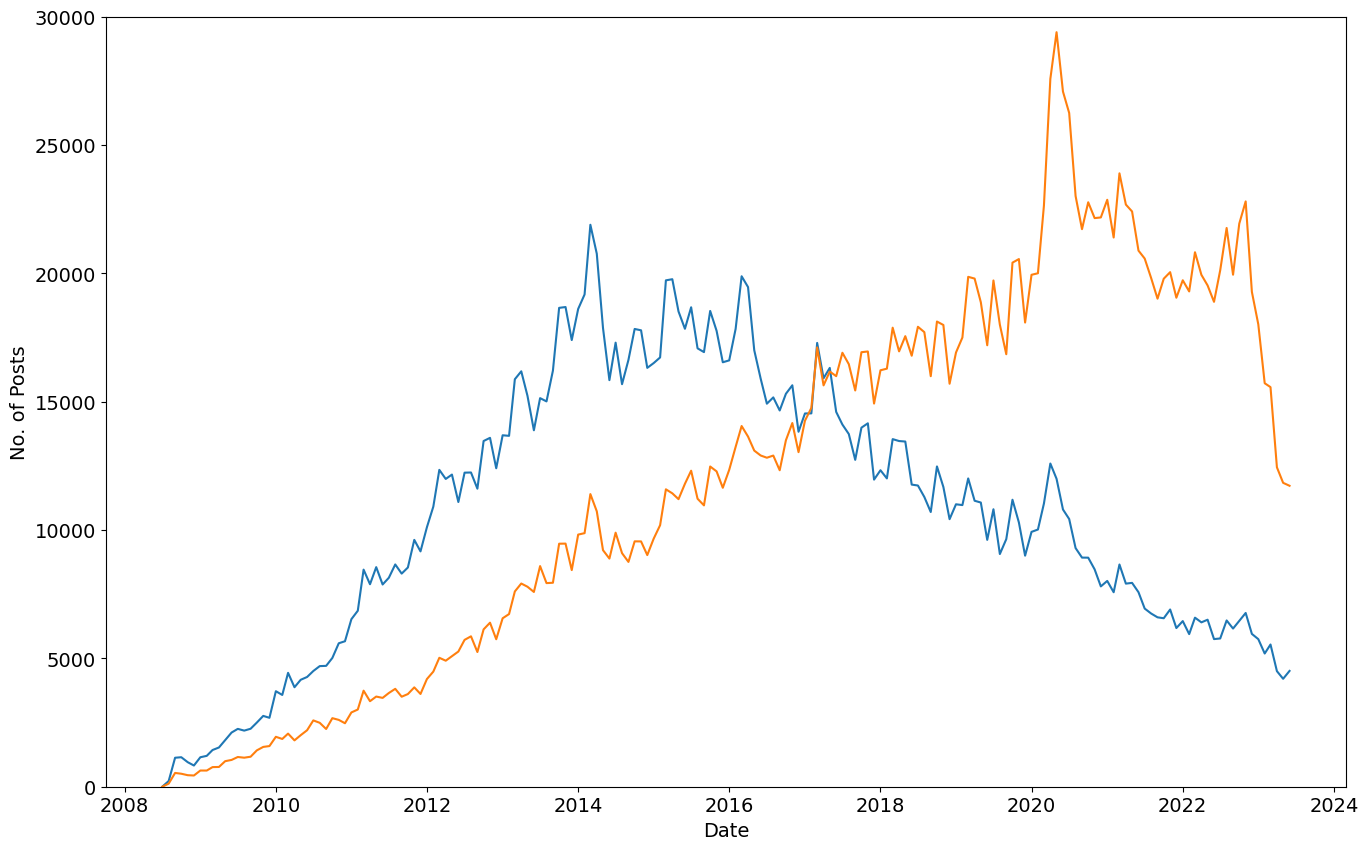

In [20]:
# Method 2:
# Index = dates
# y axis = java column of pivoted table
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("No. of Posts", fontsize=14)
plt.ylim(0, 30000)

plt.plot(pivoted_compute_df.index, pivoted_compute_df["java"])
plt.plot(pivoted_compute_df.index, pivoted_compute_df["python"])
plt.show()

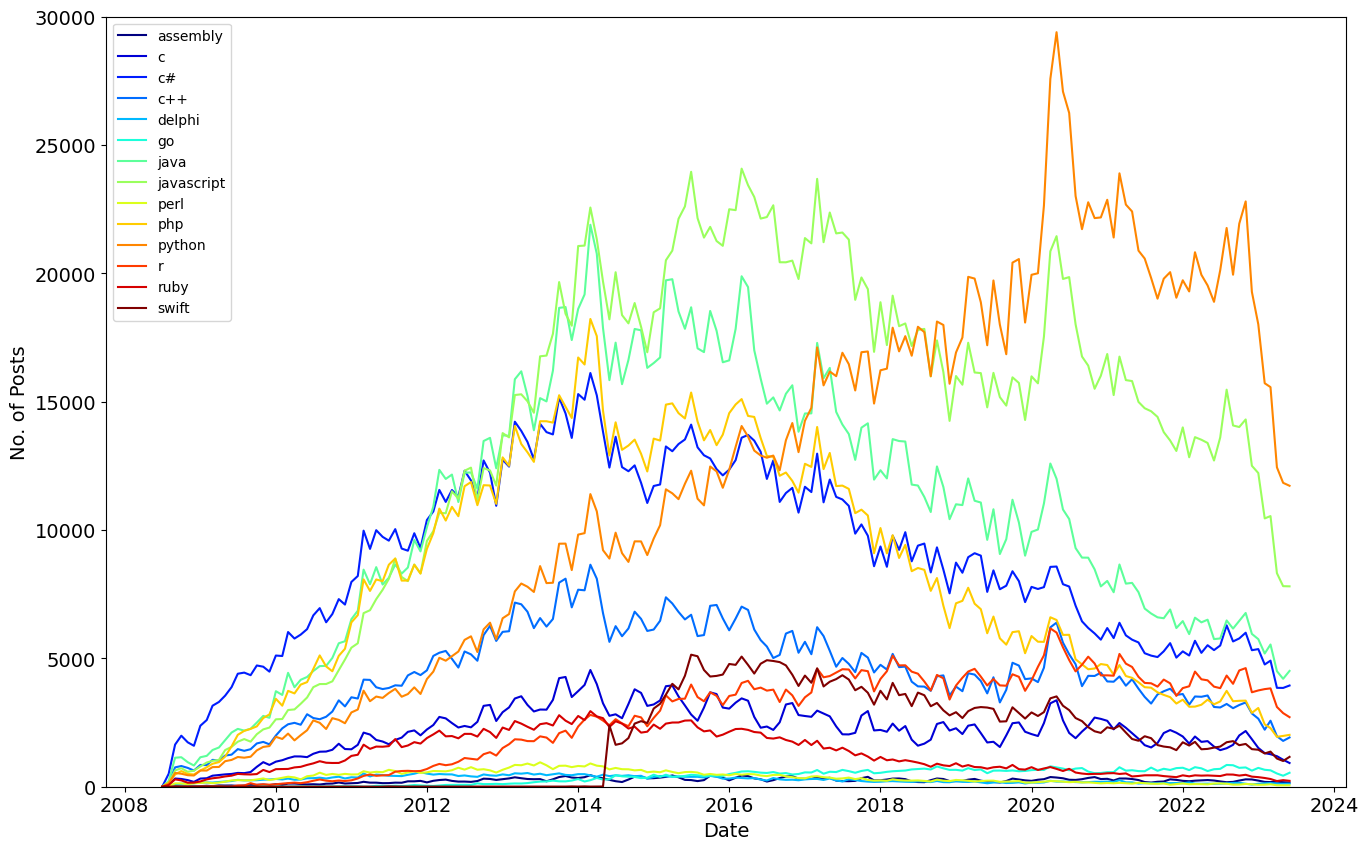

In [30]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("No. of Posts", fontsize=14)
plt.ylim(0, 30000)

# Use colormap to ensure plot colours aren't repeated - with so many plots, regular matplotlib plotting cycles through certain number
# In reality shouldn't be plotting so many on same chart
colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, len(pivoted_compute_df.columns)))))

# Method 1: loop
# for column in pivoted_compute_df.columns:
#     plt.plot(pivoted_compute_df.index, pivoted_compute_df[column], label=column)

# <ethod 2: 
plt.plot(pivoted_compute_df.index, pivoted_compute_df, label=pivoted_compute_df.columns)

plt.legend()
plt.show()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 